## Setup

In [1]:
from __future__ import print_function
import os, sys
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
sns.set_context("paper")
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True
plt.rcParams['image.cmap'] = 'viridis'


## Load Data

In [2]:
import numpy as np
number_len = 28; number_copy = 30

Test_Cite = np.zeros((number_copy,number_len)); Train_Cite = np.zeros((number_copy,number_len))
Test_Cora = np.zeros((number_copy,number_len)); Train_Cora = np.zeros((number_copy,number_len))
Test_Pubm = np.zeros((number_copy,number_len)); Train_Pubm = np.zeros((number_copy,number_len))


with open('data/Citeseer/citeseer_microf.txt', newline='') as f:
        spamreader = f.readlines()
        i = 0; j = 0
        for line in spamreader:
            num = line.split()
            Train_Cite[i,j] = float(num[2])      
            Test_Cite[i,j]= float(num[0])
            j = j+1 
            if (j == 28):
                j = 0 
                i = i + 1
            
with open('data/Cora/cora_microf.txt' , newline='') as f:
        spamreader = f.readlines()
        i = 0; j = 0
        for line in spamreader:
            num = line.split()
            Train_Cora[i,j] = float(num[2])      
            Test_Cora[i,j]= float(num[0])
            j = j+1 
            if (j == 28):
                j = 0 
                i = i + 1 
                
with open('data/Pubmed/pubmed_microf.txt'  , newline='') as f:
        spamreader = f.readlines()
        i = 0; j = 0
        for line in spamreader:
            num = line.split()
            Train_Pubm[i,j] = float(num[2])      
            Test_Pubm[i,j]= float(num[0])
            j = j+1
            if (j == 28):
                j = 0 
                i = i + 1 
                
Train_Cora_av  = np.mean(Train_Cora[:,:],0)
Test_Cora_av  = np.mean(Test_Cora[:,:],0)

Train_Cite_av  = np.mean(Train_Cite[:,:],0)
Test_Cite_av  = np.mean(Test_Cite[:,:],0)

Train_Pubm_av  = np.mean(Train_Pubm[:,:],0)
Test_Pubm_av  = np.mean(Test_Pubm[:,:],0)

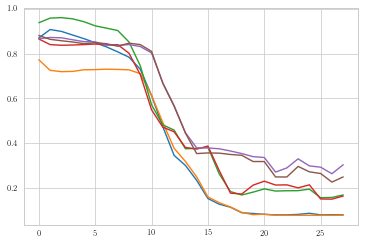

In [3]:
plt.plot(Train_Cite_av)
plt.plot(Test_Cite_av)

plt.plot(Train_Cora_av)
plt.plot(Test_Cora_av)

plt.plot(Train_Pubm_av)
plt.plot(Test_Pubm_av)

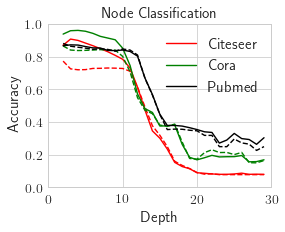

In [4]:
import matplotlib
plt.figure(figsize=(4, 3))
#gs = plt.GridSpec(1, 3)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

length = np.linspace(2, 29, num=28)

#plt.subplot(gs[0, 0])
plt.plot(length,Train_Cite_av,color='red', label='Citeseer')
plt.plot(length,Test_Cite_av, color='red',ls='--')

plt.plot(length,Train_Cora_av,color='green', label='Cora')
plt.plot(length,Test_Cora_av, color='green',ls='--')

plt.plot(length,Train_Pubm_av,color='black', label = 'Pubmed')
plt.plot(length,Test_Pubm_av, color='black',ls='--')

plt.xlabel('Depth', fontsize=15); plt.ylabel('Accuracy', fontsize=15)
plt.ylim(0,1)
plt.xlim(0,30)
plt.title('Node Classification', fontsize=15)
plt.legend(fontsize=15)


plt.savefig("fig2_node_class.pdf" ,  bbox_inches='tight')